# Building a Regression Model in Keras

## D. Increase the number of hidden layers

Repeat part B **but use a neural network with the following instead**:

- Three hidden layers, each of 10 nodes and ReLU activation function.



### Import libraries that are required for the solution

In [6]:
import keras
import pandas as pd
import numpy as np

# for building neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

# for splitting data using scikit-learn library
from sklearn.model_selection import train_test_split

# for evaluating the model with mean squared error function from scikit-learn
from sklearn.metrics import mean_squared_error

# for visualizing the mean squared errors with statistics
import matplotlib.pyplot as plt

import warnings

2025-02-27 17:17:16.450006: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Read the data

In [8]:
filepath = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
concrete_data = pd.read_csv(filepath)
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Split data into predictors and target

In [12]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']]
target = concrete_data['Strength']

In [14]:
n_cols = predictors.shape[1]

### B. Normalize the data

In [17]:
predictors_normalized = (predictors - predictors.mean())/ predictors.std()
predictors_normalized.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


#### Build Neural Network

Defining a function that defines our regression model for us so that we can conveniently call it to create our model. 

There will be three hidden layers, each of 10 nodes and ReLU activation function

In [20]:
def regression_model():
    # Create a model with 3 hidden layers with each of 10 nodes, ReLU activation function,
    #   use adam optimizer, and the mean squared error as loss function
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

### 1. Split the data to training and testing

Randomly splitting the data into a training and test sets by holding 30% of the data for testing using **train_test_split** function from the scikit-learn module.

<div class="alert alert-info"> 

  **Note:** We will be using the normalized data

</div> 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(predictors_normalized,target,test_size=0.3,random_state=42)

### 2. Train the model

Train the model on the training data using **50 epochs**.

In [28]:
# build the model
model = regression_model()
model.fit(X_train, y_train, epochs=50, verbose=2)

Epoch 1/50
23/23 - 1s - 47ms/step - loss: 1570.7512
Epoch 2/50
23/23 - 0s - 3ms/step - loss: 1545.2075
Epoch 3/50
23/23 - 0s - 3ms/step - loss: 1501.7332
Epoch 4/50
23/23 - 0s - 3ms/step - loss: 1425.9169
Epoch 5/50
23/23 - 0s - 3ms/step - loss: 1297.7412
Epoch 6/50
23/23 - 0s - 3ms/step - loss: 1104.5205
Epoch 7/50
23/23 - 0s - 3ms/step - loss: 841.0506
Epoch 8/50
23/23 - 0s - 3ms/step - loss: 560.4488
Epoch 9/50
23/23 - 0s - 3ms/step - loss: 364.0211
Epoch 10/50
23/23 - 0s - 3ms/step - loss: 277.6898
Epoch 11/50
23/23 - 0s - 3ms/step - loss: 242.7578
Epoch 12/50
23/23 - 0s - 3ms/step - loss: 221.0121
Epoch 13/50
23/23 - 0s - 4ms/step - loss: 204.7612
Epoch 14/50
23/23 - 0s - 4ms/step - loss: 193.1596
Epoch 15/50
23/23 - 0s - 6ms/step - loss: 184.2783
Epoch 16/50
23/23 - 0s - 3ms/step - loss: 177.1209
Epoch 17/50
23/23 - 0s - 3ms/step - loss: 170.7676
Epoch 18/50
23/23 - 0s - 3ms/step - loss: 165.9985
Epoch 19/50
23/23 - 0s - 3ms/step - loss: 161.7895
Epoch 20/50
23/23 - 0s - 3ms/step

### 3. Evaluate the Model on the test data

 Evaluating the model on the test data 

In [33]:
# Prediction
predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


computing the mean squared error between the predicted concrete strength and the actual concrete strength using mean_squared_error function from Scikit-learn.

In [36]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error after testing the model: {mse}")

Mean Squared Error after testing the model: 124.96258773572575


### 4. Repeating the steps 1-3, 50 times

In [42]:
# Empty list for storing al MSE values
mse_normalized_3_hidden =[]

for i in range(50):
    print(f"Step # {i}")
    # 1. Randomly split the data by holding 30% of the data for testing
    X_train, X_test, y_train, y_test = train_test_split(predictors_normalized,target,test_size=0.3,random_state=42)

    # 2. Train the model for 50 epochs
    model = regression_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)

    predictions = model.predict(X_test)

    # 3. Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    mse_normalized_3_hidden.append(mse)

print(mse_normalized_3_hidden)

Step # 0
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 1
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 4
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 6
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 7
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Step # 8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 9
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Step # 10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 11
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 12
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 13
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 14
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 16
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 17
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 18
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 19
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Step # 20


In [46]:
# Create a dataframe with the MSE scores
x_values = np.arange(len(mse_normalized_3_hidden))

df_normalized = pd.DataFrame({
    'iteration': x_values,
    'mse': mse_normalized_3_hidden
})

# Save to CSV
df_normalized.to_csv('neural_network_regression_normalized_mse_3_hidden_layers.csv', index=False)

### 5. Reporting the mean and standard deviation of the mean squared errors

In [50]:
# Calculate the mean and standard deviation
mean_mse_3_hidden = np.mean(mse_normalized_3_hidden)
std_mse_3_hidden = np.std(mse_normalized_3_hidden)

# Print the values on screen
print(f"Mean of MSE: {mean_mse_3_hidden}")
print(f"Standard Deviation of MSE: {std_mse_3_hidden}")

Mean of MSE: 125.19247268220288
Standard Deviation of MSE: 14.158979260068833


For comparison, lets get the mean squared errors calculated from normalized data

In [55]:
df_mse_normalized = pd.read_csv('neural_network_regression_normalized_mse.csv')
mean_mse_normalized = df_mse_normalized['mse'].mean()
std_mse_normalized = df_mse_normalized['mse'].std(ddof=0)

print(f"Mean of MSE (unnormalized): {mean_mse_normalized}")
print(f"Standard Deviation of MSE (unnormalized): {std_mse_normalized}")

Mean of MSE (unnormalized): 347.9859481570286
Standard Deviation of MSE (unnormalized): 94.15356142954823


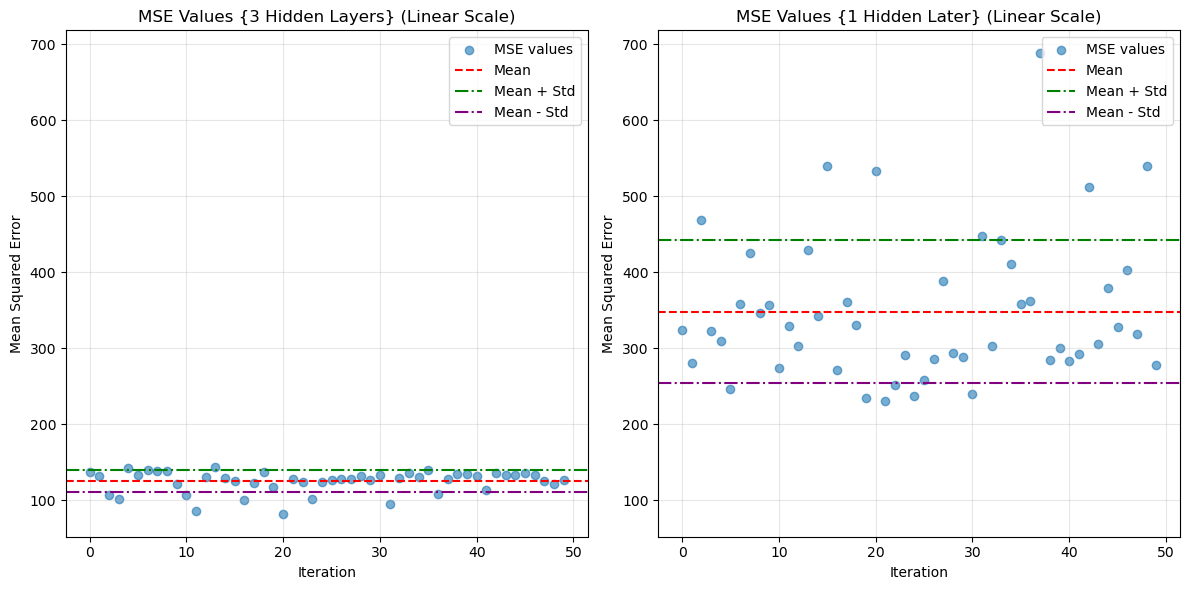

In [59]:
x_values = np.arange(len(mse_normalized_3_hidden))

# Calculate the overall min and max for y-axis
y_min = min(min(mse_normalized_3_hidden), df_mse_normalized['mse'].min())
y_max = max(max(mse_normalized_3_hidden), df_mse_normalized['mse'].max())

# Add some padding (e.g., 5%) to make sure all elements are visible
padding = (y_max - y_min) * 0.05
y_min = y_min - padding
y_max = y_max + padding

plt.figure(figsize=(12, 6))

# Normalized data plot
plt.subplot(1, 2, 1)
plt.scatter(x_values, mse_normalized_3_hidden, alpha=0.6, label='MSE values')
plt.axhline(y=mean_mse_3_hidden, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_mse_3_hidden + std_mse_3_hidden, color='green', linestyle='-.', label='Mean + Std')
plt.axhline(y=mean_mse_3_hidden - std_mse_3_hidden, color='purple', linestyle='-.', label='Mean - Std')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE Values {3 Hidden Layers} (Linear Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(y_min, y_max)  # Set y-axis limits

# Unnormalized data plot
plt.subplot(1, 2, 2)
plt.scatter(x_values, df_mse_normalized['mse'], alpha=0.6, label='MSE values')
plt.axhline(y=mean_mse_normalized, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_mse_normalized + std_mse_normalized, color='green', linestyle='-.', label='Mean + Std')
plt.axhline(y=mean_mse_normalized - std_mse_normalized, color='purple', linestyle='-.', label='Mean - Std')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE Values {1 Hidden Later} (Linear Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.tight_layout()

### Result

After increasing the number of hidden layers from 1 to 3 (above scatter plot on the left):
- Even Lower variability in MSE (1 hidden layer std = 94.15 vs **`3 hidden layers std = 14.16`**)
- **`Mean MSE of 125.19`** (was 347.99 for 1 hidden layer)
- A few low values of MSE below 100
- **`Better model stability`**.

<div class="alert alert-success">
 This lower variability indicates that increasing the hidden layers helped improving the model's performance.
</div>




